## Comparing real world experiments vs simulations

In [13]:
import crowded.simulate as cs
import crowded.method as cm
import crowded.make as mk
from pycm import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### GEO

In [2]:
total_tasks = 1643
p_hard_tasks = 0
number_of_valid_answers = 9
total_workers = 145
workers_per_task = 3
percentage_to_train = 0.3

1 run

In [3]:
df = mk.crowd_table(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
print(matrix.Overall_ACC)

0.9801176709271657


In [4]:
df.head()

,task_id,worker_id,true_answers,label_task,prob_task,prob_worker,worker_answers,performance
0,task_JWHwThB9arc6,8jC2da5nWhdf,punch,easy_task,0.99,0.637995,punch,1
1,task_JWHwThB9arc6,zQxJHGe4LDmY,punch,easy_task,0.99,0.846660,punch,1
2,task_JWHwThB9arc6,tYDgCyqAAWW3,punch,easy_task,0.99,0.747435,punch,1
3,task_gWgmzHh8aWTy,YuFVWgspyTs7,filters,easy_task,0.57,0.586026,filters,1
4,task_gWgmzHh8aWTy,YsdrFfet4xDf,filters,easy_task,0.57,0.639410,filters,1


----

## Simulated 100 runs

In [5]:
acc_table = pd.DataFrame()

In [6]:
accuracy = []
for i in range (100):
    df = mk.crowd_table(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
    matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
    accuracy.append(matrix.Overall_ACC)
acc_table['2stages'] = accuracy

In [7]:
acc_table['2stages'].describe()

count    100.000000
mean       0.978807
std        0.002439
min        0.972408
25%        0.977480
50%        0.978900
75%        0.980523
max        0.986001
Name: 2stages, dtype: float64

In [8]:
accuracy1 = []
for i in range (100):
    df = mk.crowd_table_one_stage(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
    matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
    accuracy1.append(matrix.Overall_ACC)
acc_table['nostages'] = accuracy1

In [9]:
acc_table['nostages'].describe()

count    100.000000
mean       0.937935
std        0.004901
min        0.926354
25%        0.934875
50%        0.937918
75%        0.940759
max        0.949280
Name: nostages, dtype: float64

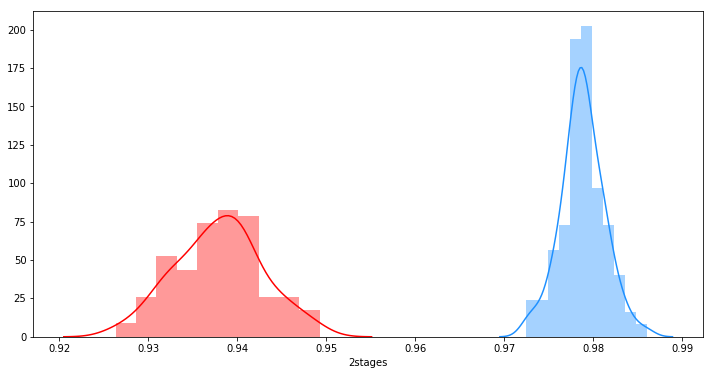

In [14]:
plt.figure(figsize=[12, 6])
sns.distplot(acc_table['nostages'], color='r', label='No stages')
sns.distplot(acc_table['2stages'], color='dodgerblue', label='Two stages')

---
## ACRyLIQ experiment (languages)

Languages 3 workers per task

In [42]:
total_tasks = 25
p_hard_tasks = 0
number_of_valid_answers = 4
total_workers = 60
workers_per_task = 3
percentage_to_train = 0.3

In [39]:
accuracy = []
for i in range (1000):
    df = mk.crowd_table(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
    matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
    accuracy.append(matrix.Overall_ACC)

In [40]:
pd.DataFrame(accuracy).describe()

,0
count,1000.000000
mean,0.959440
std,0.021856
min,0.866667
25%,0.946667
50%,0.960000
75%,0.973333
max,1.000000


In [43]:
accuracy = []
for i in range (1000):
    df = mk.crowd_table_one_stage(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
    matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
    accuracy.append(matrix.Overall_ACC)

In [44]:
pd.DataFrame(accuracy).describe()

,0
count,1000.000000
mean,0.894347
std,0.035766
min,0.773333
25%,0.866667
50%,0.893333
75%,0.920000
max,0.986667


Languages 5 workers per task

Languages 7 workers per task

In [48]:
workers_per_task = 7

In [49]:
accuracy = []
for i in range (1000):
    df = mk.crowd_table(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
    matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
    accuracy.append(matrix.Overall_ACC)

In [40]:
pd.DataFrame(accuracy).describe()

,0
count,1000.000000
mean,0.959440
std,0.021856
min,0.866667
25%,0.946667
50%,0.960000
75%,0.973333
max,1.000000


In [43]:
accuracy = []
for i in range (1000):
    df = mk.crowd_table_one_stage(total_tasks, total_workers, p_hard_tasks, percentage_to_train,
                        workers_per_task, number_of_valid_answers)
    matrix = ConfusionMatrix(list(df['true_answers']), list(df['worker_answers']))
    accuracy.append(matrix.Overall_ACC)

In [44]:
pd.DataFrame(accuracy).describe()

,0
count,1000.000000
mean,0.894347
std,0.035766
min,0.773333
25%,0.866667
50%,0.893333
75%,0.920000
max,0.986667
